In [3]:
from torch_geometric.datasets import TUDataset
import numpy as np

In [4]:
ds = TUDataset("/tmp/PROTEINS", "PROTEINS", use_node_attr=True)
ds.num_features, ds.num_classes, len(ds)

(4, 2, 1113)

In [3]:
ds.y.unique()

tensor([0, 1])

In [8]:
ds.num_edge_labels

0

In [4]:
ds.y.sum()

tensor(450)

In [15]:
np.unique(ds.x[:,0], axis=0)

array([-538., -345., -344., -134., -125.,  -96.,    1.,    2.,    3.,
          4.,    5.,    6.,    7.,    8.,    9.,   10.,   11.,   12.,
         13.,   14.,   15.,   16.,   17.,   18.,   19.,   20.,   21.,
         22.,   23.,   24.,   25.,   26.,   27.,   28.,   29.,   30.,
         31.,   32.,   33.,   34.,   35.,   36.,   37.,   38.,   39.,
         41.,   42.,   47.,   61.,   63.,   73.,   74.,   75.,   82.,
        104.,  353.,  355.,  360.,  558.,  797.,  798.], dtype=float32)

In [16]:
len(np.unique(ds.x[:,0], axis=0))

61

In [34]:
ds.edge_index

tensor([[    0,     0,     0,  ..., 43470, 43470, 43470],
        [   11,    22,    32,  ..., 43438, 43468, 43469]])

In [5]:
ds.num_node_features

3

In [1]:
# Visualize the graph
import networkx as nx

In [5]:
graph = ds[0]
graph

Data(edge_index=[2, 162], x=[42, 4], y=[1])

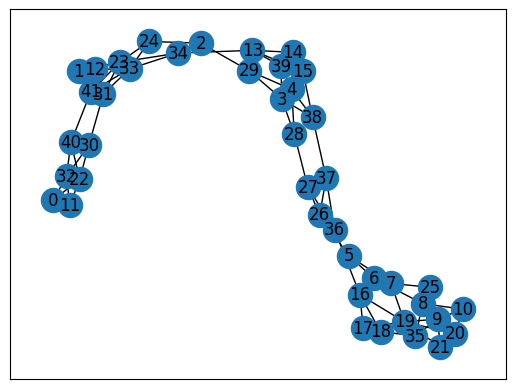

In [10]:
G = nx.Graph() 
G.add_edges_from(graph.edge_index.T.tolist())
nx.draw_networkx(G)